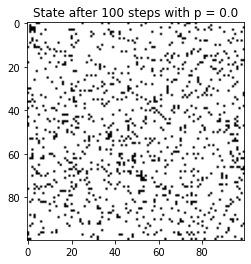

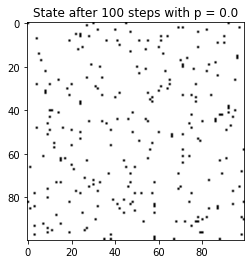

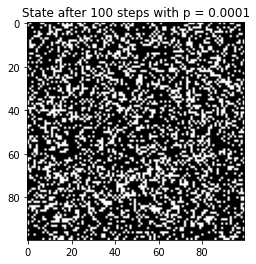

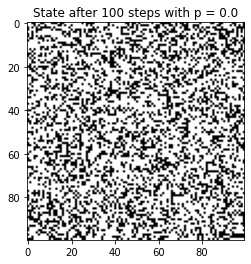

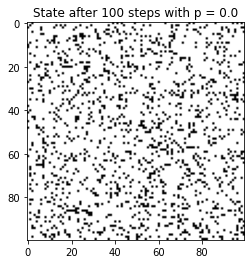

In [48]:
# Trying out 100 x 100 grid

import matplotlib
import numpy as np
from pylab import *
from random import randrange

%matplotlib inline

n = 100
T = [1, 2, 3, 4, 5]

def initialize():
    global config, nextconfig, current_density
    p = np.random.rand()
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = -1 if np.random.rand() < p else 1
    nextconfig = zeros([n, n])
    current_density = 0
    
def observe(steps):
    global config, nextconfig, current_density
    cla()
    plt.imshow(config, vmin = -1, vmax = 1, cmap = cm.binary)
    plt.title(f'State after {steps} steps with p = {current_density/10**4}')
    plt.show()

def update(t):
    global config, nextconfig, current_density
    current_density = 0
    count = 0
    E = 0
    
    x = randrange(n)
    y = randrange(n)
    
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == -1 and dy == 0:
                count += config[(x + dx) % n, (y + dy) % n]
            elif dx == 1 and dy == 0:
                count += config[(x + dx) % n, (y + dy) % n]
            else:
                if dx == 0 and dy == -1:
                    count += config[(x + dx) % n, (y + dy) % n]
                elif dx == 0 and dy == 1:
                    count += config[(x + dx) % n, (y + dy) % n]
                else:
                    continue
            
    E = (-1) * config[x, y] * count
            
    if np.random.rand() < min(1, np.exp(2 * E/t)):
        config[x, y] == config[x, y] * (-1)
                        
    current_density = current_density + 1 if nextconfig[x, y] == 1 else current_density
    config, nextconfig = nextconfig, config

for j in T:
    initialize()
    for i in range(100):
        update(j)
    observe(100)

In [ ]:
# Trying out 10 x 10 grid to count average magnetization

import matplotlib
import numpy as np
from pylab import *
from random import randrange

%matplotlib inline

n = 10
T = [1, 2, 3, 4, 5]

def initialize():
    global config, current_density
    p = np.random.rand()
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = -1 if np.random.rand() < p else 1
    nextconfig = zeros([n, n])
    current_density = 0
    
def observe(steps):
    global config, current_density
    cla()
    plt.imshow(config, vmin = -1, vmax = 1, cmap = cm.binary)
    plt.title(f'State after {steps} steps with p = {current_density/10**4}')
    plt.show()

def update(t):
    global config, current_density, current_magnetization
    current_density = 0
    current_magnetization = 0
    count = 0
    E = 0
    
    x = randrange(n)
    y = randrange(n)
    
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == -1 and dy == 0:
                count += config[(x + dx) % n, (y + dy) % n]
            elif dx == 1 and dy == 0:
                count += config[(x + dx) % n, (y + dy) % n]
            else:
                if dx == 0 and dy == -1:
                    count += config[(x + dx) % n, (y + dy) % n]
                elif dx == 0 and dy == 1:
                    count += config[(x + dx) % n, (y + dy) % n]
                else:
                    continue
            
    E = (-1) * config[x, y] * count
            
    if np.random.rand() < min(1, np.exp(2 * E/t)):
        config[x, y] == config[x, y] * (-1)
                        
    current_density = current_density + 1 if nextconfig[x, y] == 1 else current_density
    
    for x in range(n):
        for y in range(n):
            current_magnetization += config[x, y]
            
    current_magnetization = current_magnetization * 1/100
    
    current_magnetization = current_magnetization
    config = config

for j in T:
    magnetization = []
    for k in range(100):
        initialize()
        for i in range(100000):
            update(j)
        magnetization.append(current_magnetization)
    plt.hist(magnetization)
    plt.show()